In [2]:
import pandas as pd
import numpy as np
import folium
from folium import plugins
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

**DF AIRLINES**

In [2]:
df_airlines = pd.read_csv("airlines.csv")

df_airlines.columns = df_airlines.columns.str.replace("fields.", '', regex=True)
df_airlines


Unnamed: 0                 id               createdTime  Unnamed: 0  \
0             0  rec0AiYzVPvFxkXgp  2024-07-21T15:40:45.000Z       419.0   
1             1  rec0FC8VbdE8M86qQ  2024-07-21T15:40:58.000Z       624.0   
2             2  rec0J9jMSeyy5tq99  2024-07-21T15:41:03.000Z       729.0   
3             3  rec0MeHMca5cGwQxr  2024-07-21T15:40:45.000Z       420.0   
4             4  rec0Sp0LUKLxXJdRo  2024-07-21T15:40:29.000Z       192.0   
..          ...                ...                       ...         ...   
676         676  reczuIzxvyoouthZi  2024-07-21T15:40:23.000Z       108.0   
677         677  reczuNfPsBcQELrue  2024-07-21T15:40:58.000Z       629.0   
678         678  reczweZRACAJq4Fi1  2024-07-21T15:40:36.000Z       297.0   
679         679  reczxx8ZZOtzisgJ5  2024-07-21T15:40:39.000Z       343.0   
680         680  reczyc36SjIdUVLTU  2024-07-21T15:40:26.000Z       148.0   

     fleet_average_age iata_code  date_founded  \
0                 18.0        M4        1980.0   
1                 15.1        XW        2014.0   
2                 18.7        V8        1942.0   
3                 16.4        NU        1967.0   
4                 17.1        8Q        1992.0   
..                 ...       ...           ...   
676               10.5        AH        1962.0   
677                6.4       3W*        2013.0   
678               23.8        ZO        2005.0   
679               27.9        8C        1988.0   
680                2.9        G9        2003.0   

                          airline_name                          country_name  \
0                          Mistral air                                 Italy   
1    Nokscoot airlines company limited                              Thailand   
2                         Ooo "atran "                                Russia   
3        Japan transocean air co. ltd.                                 Japan   
4                             Onur air                                Turkey   
..                                 ...                                   ...   
676                        Air algerie                               Algeria   
677                  Malawian airlines                                Malawi   
678                    Zagros airlines                                  Iran   
679   Air transport international inc.  United States Minor Outlying Islands   
680                         Air arabia                  United Arab Emirates   

     fleet_size             type  
0           8.0        scheduled  
1           3.0        scheduled  
2           1.0  scheduled,cargo  
3           8.0        scheduled  
4          25.0        scheduled  
..          ...              ...  
676        51.0        scheduled  
677         2.0        scheduled  
678        15.0        scheduled  
679        11.0  scheduled,cargo  
680        36.0        scheduled  

[681 rows x 11 columns]

**GRÁFICO - GRÁFICO DE DISPERSIÓN ENTRE EDAD DE FLOTA Y CANTIDAD DE FLOTA**

***Segmentado por Países y Aerolíneas***

C:\Users\carol\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


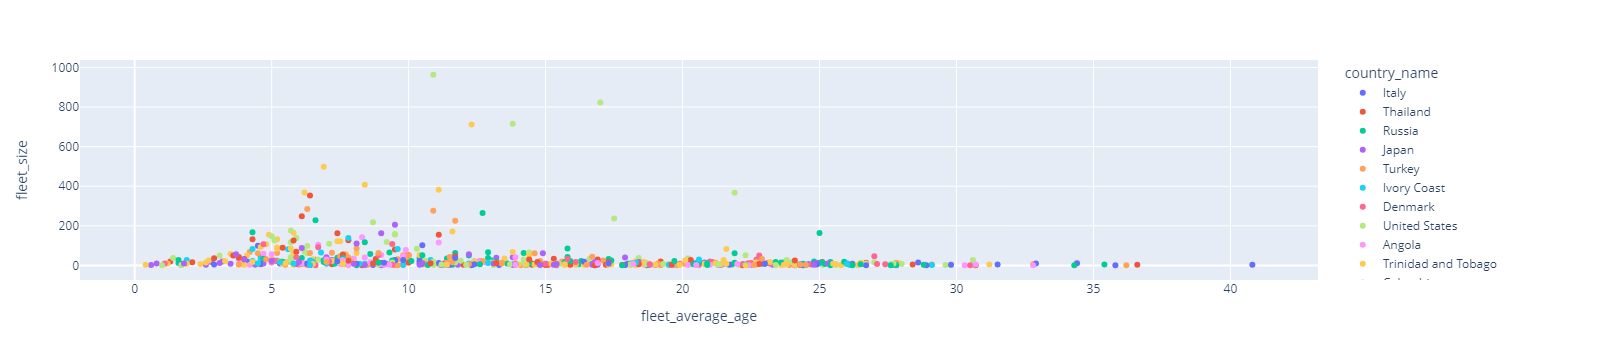

In [3]:
#RELACIONAR FLOTA DE AEROLÍNEAS CON PAÍSES

px.scatter(data_frame  = df_airlines,
           x           = "fleet_average_age",
           y           = "fleet_size",
           color       = "country_name",
           hover_name  = "airline_name",)

In [4]:
#La mayoría de aerolíneas tiene una flota de unos 200 aviones aprox y su edad media es de hasta 10,5 años.

**GRÁFICO - NÚMERO DE FLOTA DE AVIONES POR PAÍSES**

In [5]:
#Primero agrupamos las aerolíneas por country name

grouped_by_country = df_airlines.groupby('country_name')['fleet_size'].sum().reset_index()

top_by_country = grouped_by_country.sort_values("fleet_size", ascending=False).head(10)
bottom_by_country = grouped_by_country.sort_values("fleet_size", ascending=False).tail(10)

***PAÍSES CON MÁS FLOTA DE AVIONES***

C:\Users\carol\AppData\Local\Temp\ipykernel_12308\2277199985.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



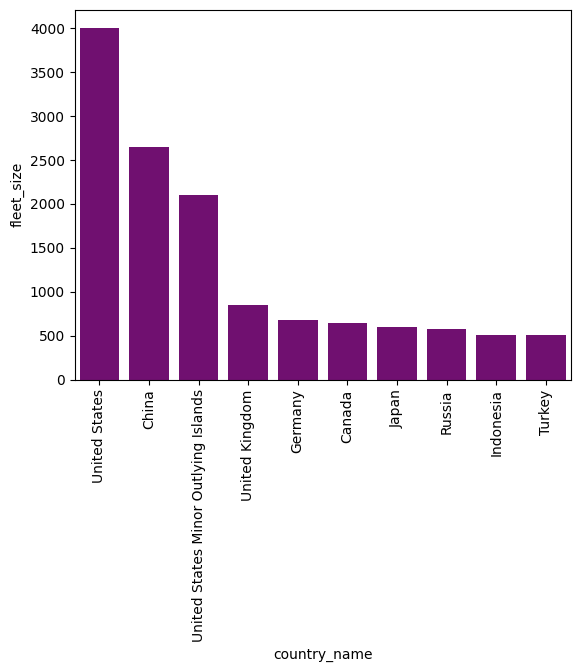

In [6]:
sns.barplot(x= "country_name", y = "fleet_size", color="purple", data = top_by_country)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

***PAÍSES CON MENOS FLOTA DE AVIONES***

C:\Users\carol\AppData\Local\Temp\ipykernel_12308\2399251231.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



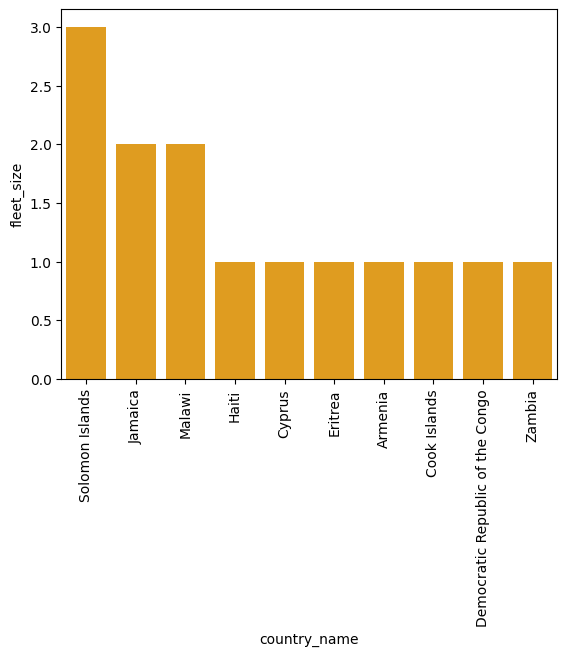

In [7]:
sns.barplot(x= "country_name", y = "fleet_size", color="orange", data = bottom_by_country)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

***PAÍSES CON MAYOR NÚMERO DE AEROLÍNEAS***


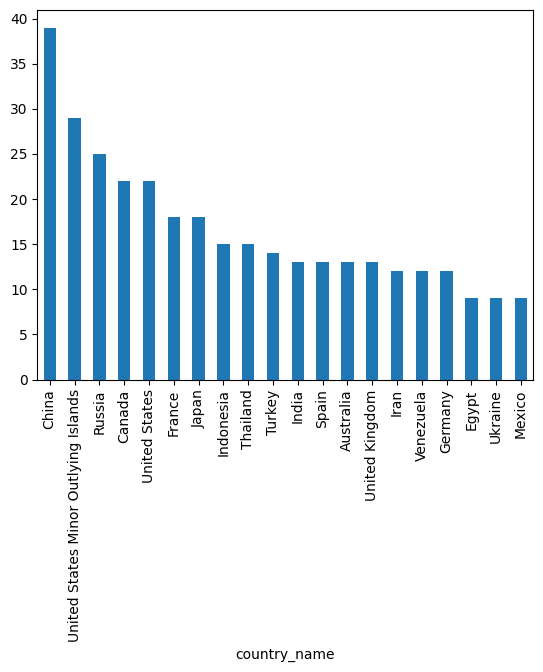

In [8]:
fig = plt.plot(figsize = 12)

df_airlines["country_name"].value_counts().head(20).plot.bar(x = "country_name", y = "airline_name")

plt.show()

**GRÁFICO - TOP 20 AEROLÍNEAS FLOTAS MÁS LONGEVAS**

C:\Users\carol\AppData\Local\Temp\ipykernel_12308\2199306046.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



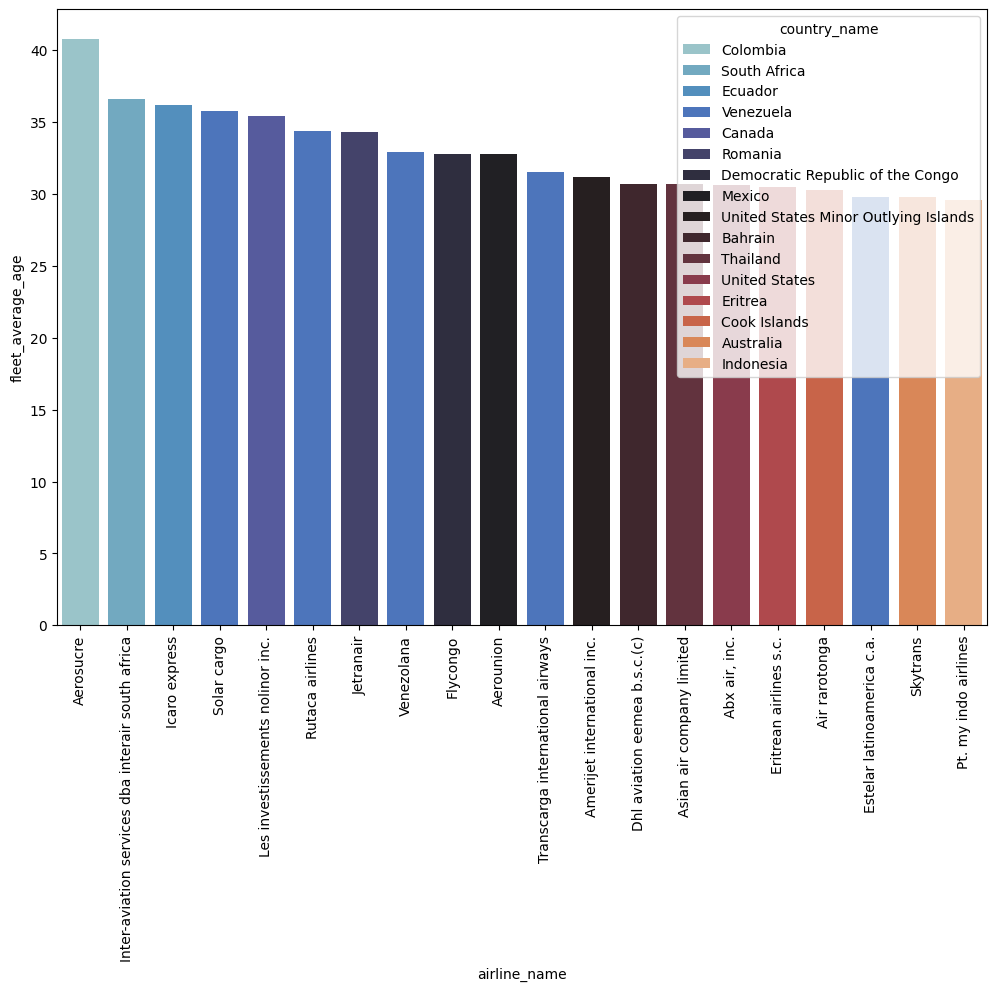

In [9]:
older_airlines = df_airlines.loc[df_airlines["fleet_average_age"].sort_values(ascending=False).head(20).index]

fig = plt.figure(figsize=(12, 8))

sns.barplot(y = "fleet_average_age", x = "airline_name", hue = "country_name", palette = "icefire", data = older_airlines)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

**GRÁFICO - TOP 20 AEROLÍNEAS FLOTAS MÁS RENOVADAS**

C:\Users\carol\AppData\Local\Temp\ipykernel_12308\1430001913.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\carol\AppData\Local\Temp\ipykernel_12308\1430001913.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



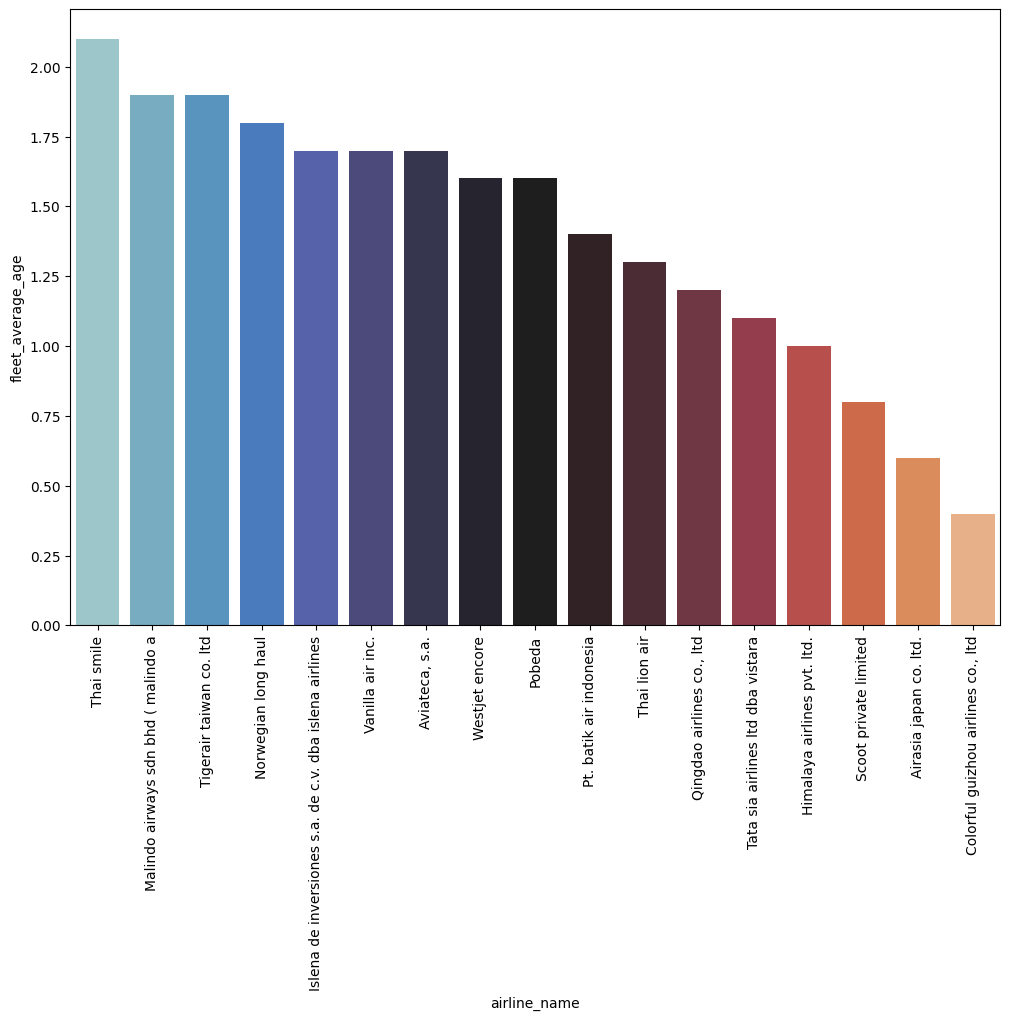

In [10]:
younger_airlines = df_airlines.loc[df_airlines["fleet_average_age"].sort_values(ascending=False).tail(20).index]

fig = plt.figure(figsize=(12, 8))
sns.barplot(y = "fleet_average_age", x = "airline_name", palette ="icefire", data = younger_airlines)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

**DF_AIRPLANES**

In [11]:
df_airplanes = pd.read_csv("airplanes.csv")

df_airplanes.columns = df_airplanes.columns.str.replace("fields.", '', regex=True)
df_airplanes

Unnamed: 0                 id               createdTime  Unnamed: 0  \
0              0  rec009wO7KCfxQ418  2024-07-21T16:00:16.000Z        6215   
1              1  rec00GsuGpXJFDyxy  2024-07-21T15:57:24.000Z        3801   
2              2  rec00Iz3XC90BrwV9  2024-07-21T15:53:10.000Z         297   
3              3  rec01UNAvu00p0uze  2024-07-21T15:58:26.000Z        4686   
4              4  rec01zG0X1ZeKibnP  2024-07-21T16:00:09.000Z        6111   
...          ...                ...                       ...         ...   
7290        7290  reczyXjwiLJDPceh3  2024-07-21T15:53:36.000Z         646   
7291        7291  reczyYtPYIeEXjKyh  2024-07-21T15:53:31.000Z         588   
7292        7292  reczyhfMAhBSYMpuG  2024-07-21T15:56:59.000Z        3449   
7293        7293  reczz5uoXGdH2isqF  2024-07-21T15:53:14.000Z         344   
7294        7294  reczzKG2b8w99Vpgp  2024-07-21T15:55:23.000Z        2083   

      index       production_line                            plane_owner  \
0     16177  Airbus A318/A319/A32                     US Bank NA Trustee   
1      9841            Boeing 767             Japan Airlines Corporation   
2       979  Airbus A318/A319/A32                Interglobe Aviation Ltd   
3     12003  Embraer ERJ-135/ERJ-                  American Airlines Inc   
4     15954         Boeing 737 NG  Wells Fargo Bank Northwest NA Trustee   
...     ...                   ...                                    ...   
7290   1719  McDonnell Douglas DC                  American Airlines Inc   
7291   1513  Airbus A318/A319/A32  Wells Fargo Bank Northwest NA Trustee   
7292   8831  Embraer EMB-190/EMB-                              HNA Group   
7293   1042             ATR 42/72  Wells Fargo Bank Northwest NA Trustee   
7294   5754            Boeing 757                            EAT Leipzig   

       iata_type airline_iata_code iata_code_long iata_code_short  \
0       A320-200                UA           A320             320   
1       B767-300                JL           B763             763   
2       A320-200                6E           A320             320   
3         ERJ140                MQ           E135             ERD   
4       B737-700                UA           B737             73W   
...          ...               ...            ...             ...   
7290     DC-9-83                AA           MD83             M83   
7291    A321-200                AA           A321             321   
7292  EMB190-100                GS           E190             E90   
7293   ATR42-500                7F           AT45             AT4   
7294    B757-200                D0           B752             75F   

      engines_count engines_type  plane_age model_name  
0                 2          JET         23       A320  
1                 2          JET         23        767  
2                 2          JET          8       A320  
3                 2          JET         17    ERJ-140  
4                 2          JET         19        737  
...             ...          ...        ...        ...  
7290              2          JET         30       MD83  
7291              2          JET         16       A321  
7292              2          JET         17    Emb-190  
7293              2    TURBOPROP         22     ATR 42  
7294              2          JET         33        757  

[7295 rows x 15 columns]

***GRÁFICO - TOP 20 DUEÑOS MODELOS BOEINGS***

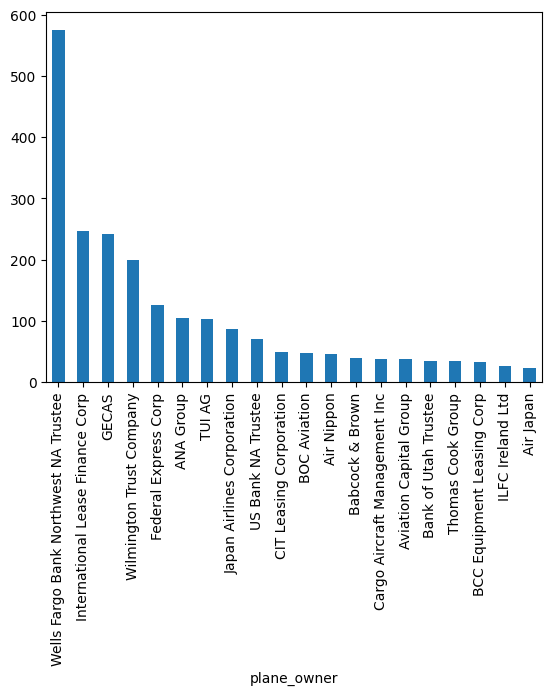

In [12]:
#FILTRO DE MODELOS BOEING

boeings = df_airplanes.loc[df_airplanes["production_line"].str.contains('Boeing')]

#TOP 20 DUEÑOS DE MODELOS BOEINGS

fig = plt.plot(figsize = 12)

boeings["plane_owner"].value_counts().head(20).plot.bar(x = "plane_owner")

plt.show()

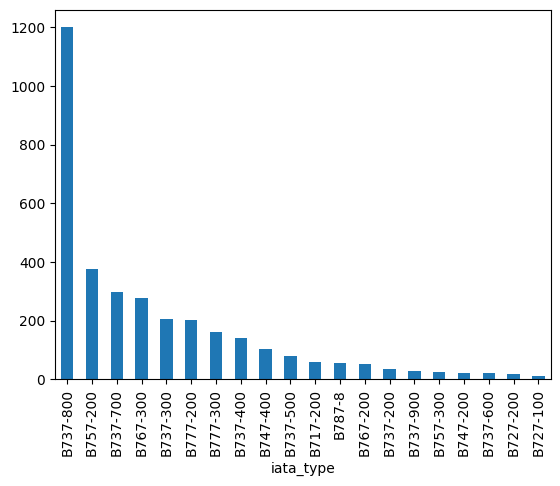

In [13]:
#TOP 20 DE MODELOS BOEINGS CLASIFICADOS POR IATA TYPE.

fig = plt.plot(figsize = 12)

boeings["iata_type"].value_counts().head(20).plot.bar(x = "iata_type")

plt.show()

**DF_CITIES**

In [3]:
df_cities = pd.read_csv("../tatos/cities.csv")

df_cities.columns = df_cities.columns.str.replace("fields.", '', regex=True)
df_cities

Unnamed: 0                 id               createdTime  Unnamed: 0  \
0              0  rec00MC2Srdn4cAkC  2024-07-21T16:12:14.000Z       661.0   
1              1  rec00NILXDQTwvv1F  2024-07-21T16:14:58.000Z      2989.0   
2              2  rec00fHyi4s6bAVYs  2024-07-21T16:20:15.000Z      7304.0   
3              3  rec00xvZ6C0AjoqAE  2024-07-21T16:16:49.000Z      4520.0   
4              4  rec01nUJej1qYWZuU  2024-07-21T16:16:48.000Z      4509.0   
...          ...                ...                       ...         ...   
8810        8810  reczy3iHtR3Ikys09  2024-07-21T16:16:23.000Z      4158.0   
8811        8811  reczy7rccnz38ukn3  2024-07-21T16:17:46.000Z      5308.0   
8812        8812  reczytqblxMmKXluQ  2024-07-21T16:17:01.000Z      4692.0   
8813        8813  reczzxGG7eoMqTE8n  2024-07-21T16:20:53.000Z      7806.0   
8814        8814  reczzySPXKAHNlByU  2024-07-21T16:17:26.000Z      5023.0   

       index                city_name iata_code gmt            timezone  \
0      905.0                     Bari       BRI   1         Europe/Rome   
1     2804.0  Hefei (Luogang Airport)       HFE   8       Asia/Shanghai   
2     6797.0                    Skien       SKE   1         Europe/Oslo   
3     4675.0                   Mackay       MKY  10  Australia/Brisbane   
4     7668.0           Mabuiag Island       UBB  10  Australia/Brisbane   
...      ...                      ...       ...  ..                 ...   
8810  3980.0                  Lansing       LAN  -5     America/Detroit   
8811  8886.0                   Nakina       YQN  -5     America/Toronto   
8812  5343.0                Manzhouli       NZH   8       Asia/Shanghai   
8813  7463.0                  Teraina       TNQ  14  Pacific/Kiritimati   
8814  4879.0             Mizan Teferi       MTF   3  Africa/Addis_Ababa   

       latitude   longitude  
0     41.126000   16.868378  
1     31.850000  117.283330  
2     59.182777    9.562500  
3    -21.176285  149.181800  
4     -9.950000  142.183330  
...         ...         ...  
8810  42.774185  -84.589580  
8811  50.166668  -86.700000  
8812  49.570590  117.331630  
8813   4.700000 -160.333330  
8814   6.966667   35.533333  

[8815 rows x 11 columns]

In [7]:
#TOP 10 ZONAS HORARIAS CON MÁS CIUDADES

df_timezone_top10 = df_cities["timezone"].value_counts().head(10)

In [5]:
# TOP 10 ZONAS HORARIAS

df_america_chicago = df_cities[df_cities['timezone']=='America/Chicago']
df_america_newyork = df_cities[df_cities['timezone']=='America/New_York']
df_pacific_port_moresby = df_cities[df_cities['timezone']=='Pacific/Port_Moresby']
df_america_anchorage = df_cities[df_cities['timezone']=='America/Anchorage']
df_america_los_angeles = df_cities[df_cities['timezone']=='America/Los_Angeles']
df_australia_brisbane = df_cities[df_cities['timezone']=='Australia/Brisbane']
df_asia_shanghai = df_cities[df_cities['timezone']=='Asia/Shanghai']
df_america_denver = df_cities[df_cities['timezone']=='America/Denver']
df_america_bogota = df_cities[df_cities['timezone']=='America/Bogota']
df_europe_berlin = df_cities[df_cities['timezone']=='Europe/Berlin']

In [6]:
df_america_chicago = df_cities[df_cities['timezone']=='America/Chicago']
df_america_chicago["longitude"].sort_values().head(100)
#valores entre -88 y -107
df_ac = df_america_chicago[(df_america_chicago["longitude"] >= -100) & (df_america_chicago["longitude"] <= -88)]

In [7]:
df_america_newyork = df_america_newyork[df_america_newyork['timezone']=='America/New_York']
df_america_newyork["longitude"].sort_values().head(100)
#valores entre -71 y -89
df_an = df_america_newyork[(df_america_newyork["longitude"] >= -85) & (df_america_newyork["longitude"] <= -75)]

In [8]:
df_pacific_port_moresby = df_cities[df_cities['timezone']=='Pacific/Port_Moresby']
df_pacific_port_moresby["longitude"].sort_values().head(100)
#valores entre 120 y 160
df_pm = df_pacific_port_moresby[(df_pacific_port_moresby["longitude"] >= 120) & (df_pacific_port_moresby["longitude"] <= 160)]#valores entre -141 

In [9]:
df_america_anchorage = df_cities[df_cities['timezone']=='America/Anchorage']
df_america_anchorage["longitude"].sort_values().head(100)
#valores entre -170 y -140
df_aa = df_america_anchorage[(df_america_anchorage["longitude"] >= -170) & (df_america_anchorage["longitude"] <= -140)]

In [10]:
df_america_los_angeles = df_cities[df_cities['timezone']=='America/Los_Angeles']
df_america_los_angeles["longitude"].sort_values()
#valores entre -130 y -105
df_ala = df_america_los_angeles[(df_america_los_angeles["longitude"] >= -130) & (df_america_los_angeles["longitude"] <= -105)]

In [11]:
df_australia_brisbane = df_cities[df_cities['timezone']=='Australia/Brisbane']
df_australia_brisbane["longitude"].sort_values()
#valores entre 138 y 153
df_ab = df_australia_brisbane[(df_australia_brisbane["longitude"] >= 138) & (df_australia_brisbane["longitude"] <= 153)]

In [13]:
df_asia_shanghai = df_cities[df_cities['timezone']=='Asia/Shanghai']
df_asia_shanghai["longitude"].sort_values()
#valores entre 72 y 138
df_as = df_asia_shanghai[(df_asia_shanghai["longitude"] >= 72) & (df_asia_shanghai["longitude"] <= 138)]

In [14]:
df_america_denver = df_cities[df_cities['timezone']=='America/Denver']
df_america_denver["longitude"].sort_values()
#valores entre -156 y -90
df_ad = df_america_denver[(df_america_denver["longitude"] >= -156) & (df_america_denver["longitude"] <= -100)]

In [15]:
df_america_bogota = df_cities[df_cities['timezone']=='America/Bogota']
df_america_bogota["longitude"].sort_values()
#valores entre -81 y -59 / latitud menor de 20
df_ab = df_america_bogota[(df_america_bogota["longitude"] >= -81) & (df_america_bogota["longitude"] <= -59) & (df_america_bogota["latitude"] <= 20)]

In [16]:
df_europe_berlin = df_cities[df_cities['timezone']=='Europe/Berlin']
df_europe_berlin["longitude"].sort_values()
#valores entre 5 y 15 
df_eb = df_europe_berlin[(df_europe_berlin["longitude"] >= 5) & (df_europe_berlin["longitude"] <= 15)]

In [19]:
cities = folium.map.FeatureGroup()

map1 = folium.Map(location=[lat, lng], zoom_start=1)

In [20]:


for lat, lng in zip(df_ac["latitude"], df_ac["longitude"]): 
    cities.add_child(folium.CircleMarker(location     = [lat, lng],
                                            radius       = 1,
                                            color        = "blue",
                                            fill         = True,
                                            fill_color   = "yellow",
                                            fill_opacity = 0.6))


for lat, lng in zip(df_an["latitude"], df_an["longitude"]): 
    cities.add_child(folium.CircleMarker(location     = [lat, lng],
                                            radius       = 1,
                                            color        = "orange",
                                            fill         = True,
                                            fill_color   = "yellow",
                                            fill_opacity = 0.6))

for lat, lng in zip(df_pm["latitude"], df_pm["longitude"]): 
    cities.add_child(folium.CircleMarker(location     = [lat, lng],
                                            radius       = 1,
                                            color        = "green",
                                            fill         = True,
                                            fill_color   = "yellow",
                                            fill_opacity = 0.6))

for lat, lng in zip(df_aa["latitude"], df_aa["longitude"]): 
    cities.add_child(folium.CircleMarker(location     = [lat, lng],
                                            radius       = 1,
                                            color        = "yellow",
                                            fill         = True,
                                            fill_color   = "yellow",
                                            fill_opacity = 0.6))

for lat, lng in zip(df_ala["latitude"], df_ala["longitude"]): 
    cities.add_child(folium.CircleMarker(location     = [lat, lng],
                                            radius       = 1,
                                            color        = "purple",
                                            fill         = True,
                                            fill_color   = "yellow",
                                            fill_opacity = 0.6))

for lat, lng in zip(df_ab["latitude"], df_ab["longitude"]): 
    cities.add_child(folium.CircleMarker(location     = [lat, lng],
                                            radius       = 1,
                                            color        = "grey",
                                            fill         = True,
                                            fill_color   = "yellow",
                                            fill_opacity = 0.6))

for lat, lng in zip(df_as["latitude"], df_as["longitude"]): 
    cities.add_child(folium.CircleMarker(location     = [lat, lng],
                                            radius       = 1,
                                            color        = "brown",
                                            fill         = True,
                                            fill_color   = "yellow",
                                            fill_opacity = 0.6))

for lat, lng in zip(df_ad["latitude"], df_ad["longitude"]): 
    cities.add_child(folium.CircleMarker(location     = [lat, lng],
                                            radius       = 1,
                                            color        = "pink",
                                            fill         = True,
                                            fill_color   = "yellow",
                                            fill_opacity = 0.6))

for lat, lng in zip(df_ab["latitude"], df_ab["longitude"]): 
    cities.add_child(folium.CircleMarker(location     = [lat, lng],
                                            radius       = 1,
                                            color        = "red",
                                            fill         = True,
                                            fill_color   = "yellow",
                                            fill_opacity = 0.6))

for lat, lng in zip(df_eb["latitude"], df_eb["longitude"]): 
    cities.add_child(folium.CircleMarker(location     = [lat, lng],
                                            radius       = 1,
                                            color        = "cyan",
                                            fill         = True,
                                            fill_color   = "yellow",
                                            fill_opacity = 0.6))
map1.add_child(cities)

map1

**DF_ARRIVAL CONCAT (12,13 Y 14 JULIO)**

In [28]:
df_arr_concat = pd.read_csv("arr_concat.csv")

df_arr_concat.columns = df_arr_concat.columns.str.replace("fields.", '', regex=True)
df_arr_concat

Unnamed: 0                 id               createdTime flight_date  \
0              0  rec001HFId9b7acve  2024-07-21T17:23:25.000Z    24/07/13   
1              1  rec03TbS1InRSc8U4  2024-07-21T17:22:02.000Z    24/07/12   
2              2  rec04sZXsxbjOGCEQ  2024-07-21T17:26:55.000Z    24/07/14   
3              3  rec04sqFxAFYgMioq  2024-07-21T17:23:16.000Z    24/07/13   
4              4  rec05GjRdumO4d2aq  2024-07-21T17:25:13.000Z    24/07/13   
...          ...                ...                       ...         ...   
5995        5995  reczxdTzJ3TnGvq1H  2024-07-21T17:23:59.000Z    24/07/13   
5996        5996  reczxzBlNt6Gg0B4L  2024-07-21T17:23:47.000Z    24/07/13   
5997        5997  reczyae0d9mfFV8Xj  2024-07-21T17:22:59.000Z    24/07/13   
5998        5998  reczyqkIRxKQjfqQ0  2024-07-21T17:21:55.000Z    24/07/12   
5999        5999  reczzVIlE0r07Z1KL  2024-07-21T17:27:13.000Z    24/07/14   

                       dep_airport      dep_timezone dep_iata dep_terminal  \
0     Chicago O'hare International   America/Chicago      ORD            3   
1            Son Sant Joan Airport     Europe/Madrid      PMI          NaN   
2               Doha International        Asia/Qatar      DOH          NaN   
3                Guglielmo Marconi       Europe/Rome      BLQ          NaN   
4                             Orly      Europe/Paris      ORY            1   
...                            ...               ...      ...          ...   
5995          El Prat De Llobregat     Europe/Madrid      BCN            1   
5996                      Schiphol  Europe/Amsterdam      AMS          NaN   
5997                  Gran Canaria   Atlantic/Canary      LPA          NaN   
5998             Charles De Gaulle      Europe/Paris      CDG            3   
5999                      Pamplona     Europe/Madrid      PNA           T1   

     dep_gate  dep_delay  airport iata       timezone  baggage  \
0         H15       67.0  Barajas  MAD  Europe/Madrid        1   
1         X99       30.6  Barajas  MAD  Europe/Madrid        0   
2          C5       13.0  Barajas   UL  Europe/Madrid        8   
3          11       10.0  Barajas  MAD  Europe/Madrid       19   
4         A20       41.0  Barajas  MAD  Europe/Madrid       17   
...       ...        ...      ...  ...            ...      ...   
5995       A8       21.0  Barajas  MAD  Europe/Madrid       14   
5996      X99       28.0  Barajas  MAD  Europe/Madrid       12   
5997      B12       14.0  Barajas  MAD  Europe/Madrid       17   
5998       11       35.0  Barajas  MAD  Europe/Madrid       18   
5999        2        5.0  Barajas   IB  Europe/Madrid       19   

           airline_names iata_airplane  
0        British Airways            BA  
1               Swiftair            WT  
2     SriLankan Airlines           MAD  
3      American Airlines            AA  
4                 Iberia            IB  
...                  ...           ...  
5995           World2Fly            2W  
5996      LATAM Airlines            LA  
5997            Alitalia            AZ  
5998             Vueling            VY  
5999              Iberia           MAD  

[6000 rows x 16 columns]

**GRÁFICO DE BARRAS**   
***Retraso medio de las 25 aerolíneas con más vuelos***

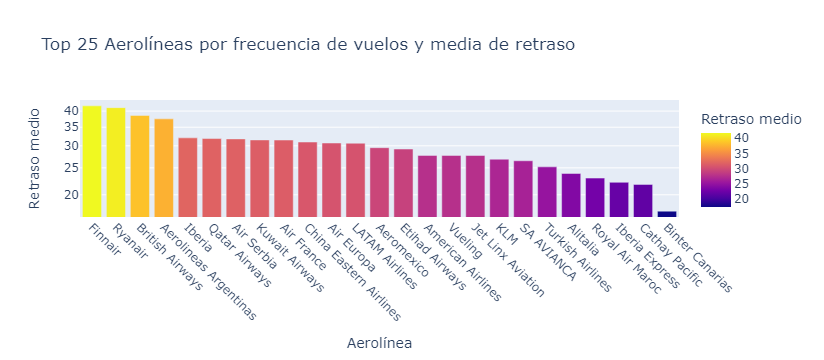

In [29]:
# Frecuencia de vuelos por cada linea aerea
flight_freq_by_airline = df_arr_concat["airline_names"].value_counts().reset_index()
flight_freq_by_airline.columns = ["airline_names", "flight_frequency"]

# Top 25
top_25_airlines = flight_freq_by_airline.nlargest(25, "flight_frequency")

# Calculo de media por delay de linea aerea
mean_delay_by_airline = df_arr_concat[df_arr_concat["airline_names"].isin(top_25_airlines["airline_names"])].groupby("airline_names")["dep_delay"].mean().reset_index()

# Ordenar las aerolíneas por la media de retraso de forma descendente
mean_delay_by_airline = mean_delay_by_airline.sort_values(by="dep_delay", ascending=False)

# Crear el gráfico de barras con Plotly Express
fig = px.bar(mean_delay_by_airline, x="airline_names", y="dep_delay", 
             title= "Top 25 Aerolíneas por frecuencia de vuelos y media de retraso",
             labels={"airline_names": "Aerolínea", "dep_delay": "Retraso medio"},
             color= "dep_delay")

# Establecer la escala logarítmica para el eje y girar título eje X
fig.update_layout(yaxis_type="log",
                  xaxis_tickangle=45)

# Mostrar el gráfico
fig.show()

*Análisis*
 
 1 - "Finair" y "Ryanair" tienen el promedio de tiempo de retraso más alta con 41 minutos por cada salida con relacion a las fecrecuencias diarias.
 
 2 - "Binter Canarias" tiene el menor promedio de tiempo de retraso con alrededor de 17 minutos por cada salida con relacion a las fecrecuencias diarias.
 
 3 - Las aerolineas tienen una media de retraso de 30 minutos.

**HISTOGRAMA**  
***Top 20 aeropuertos llegan a Madrid (por timezone)***

C:\Users\carol\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



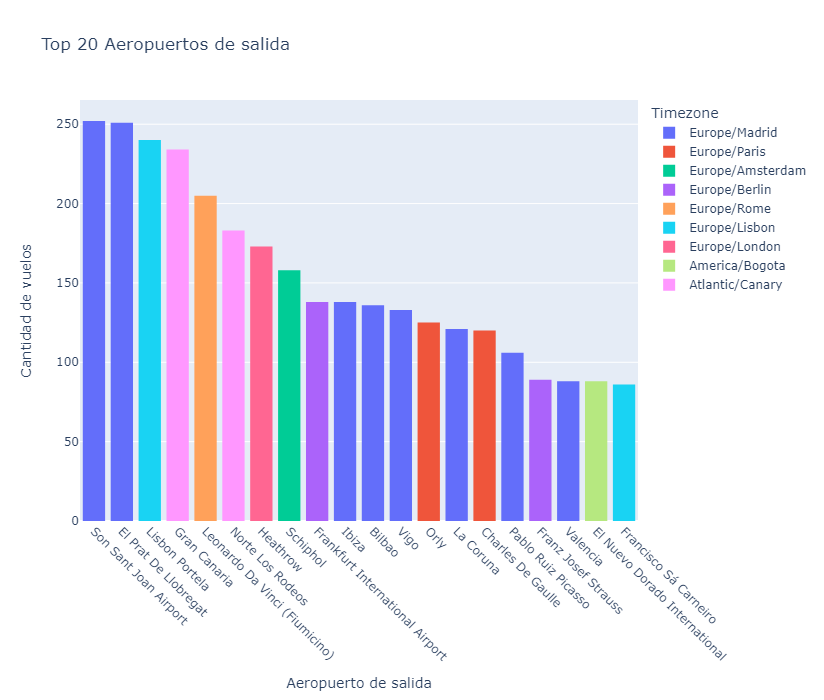

In [30]:
# Calculo de frecuencia de vuelos por cada aeropuerto de salida
top_20_dep_airport = df_arr_concat["dep_airport"].value_counts().nlargest(20).reset_index()
top_20_dep_airport.columns = ["dep_airport", "flight_frequency"]

# Filtrar los datos originales para incluir solo los top 20 aeropuertos de salida
filtered_df = df_arr_concat[df_arr_concat["dep_airport"].isin(top_20_dep_airport["dep_airport"])]

# Crear el histograma
fig = px.histogram(filtered_df, 
                   x="dep_airport",
                   color="dep_timezone",
                   nbins=20,
                   title="Top 20 Aeropuertos de salida",
                   category_orders={"dep_airport": top_20_dep_airport["dep_airport"].tolist()})

# Actualizar etiquetas y título
fig.update_layout(
    xaxis_title="Aeropuerto de salida",
    yaxis_title="Cantidad de vuelos",
    legend_title="Timezone",
    width=800, 
    height=700,
    xaxis_tickangle=45
)

fig.show()

*Análisis*
 
 1 - La mitad de la mayoría de vuelos que llegan a Madrid, salen de España (8 nacionales, 2 Canarias)
 
 2 - El resto son de Europa, menos uno a Colombia.

**GRÁFICO DE BARRAS**     
***Top aerolíneas de salida por fecha***

C:\Users\carol\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



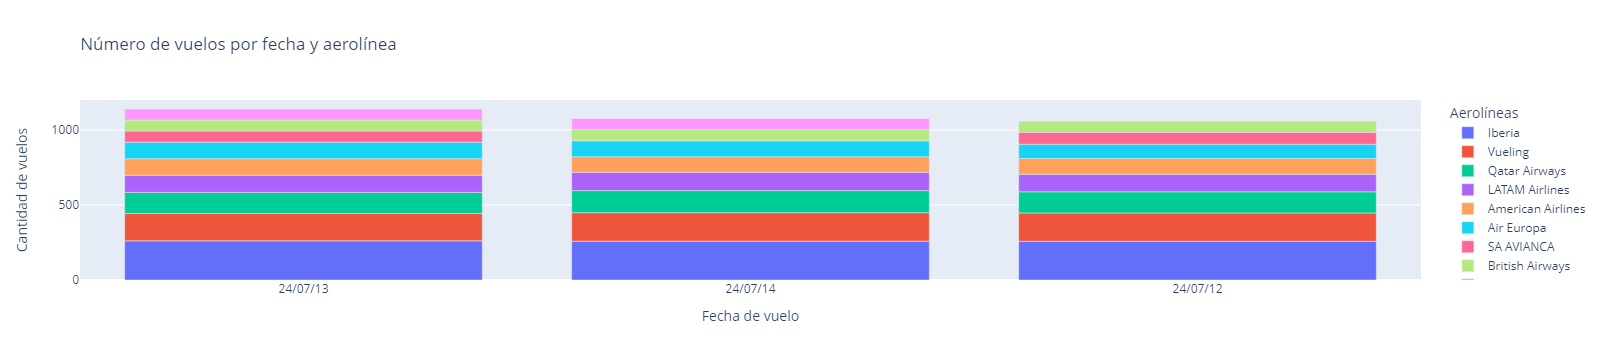

In [31]:
# Agrupar los datos por fecha de vuelo y nombres de aerolíneas, y contar el número de vuelos
df_grouped = df_arr_concat.groupby(["flight_date", "airline_names"]).size().reset_index(name="count")

# Ordenar los datos por la cantidad de vuelos en orden descendente
df_grouped = df_grouped.sort_values(by='count', ascending=False)

# Obtener los primeros 25 registros
df_top_25 = df_grouped.head(25)

# Crear una lista ordenada de aerolíneas basada en la suma total de vuelos
airlines_order = df_grouped.groupby("airline_names")["count"].sum().sort_values(ascending=False).index.tolist()

# Crear el gráfico de barras
fig = px.bar(df_top_25, 
             x="flight_date", 
             y="count", 
             color="airline_names",
             title="Número de vuelos por fecha y aerolínea",
             category_orders={"airline_names": airlines_order})

# Actualizar etiquetas y título
fig.update_layout(
    xaxis_title="Fecha de vuelo",
    yaxis_title="Cantidad de vuelos",
    legend_title="Aerolíneas")

# Mostrar el gráfico
fig.show()

*Analisis*
 
 1 - Observamos que la cantidad de vuelos es muy similar en los diferentes días (entre 1.200-1.100).
 
 2 - El número de vuelos por aerolínea también son prácticamente iguales.
 
 3 - Las aerolíneas que vuelan también son muy similares. Sólo cambia que SA Avianca no vuela el sábado y Aeromexico no vuela el domingo con respecto a las del viernes.

In [27]:
df_dep_concat = pd.read_csv("../tatos/df_dep_concat.csv")
df_dep_concat.columns = df_dep_concat.columns.str.replace('fields.','', regex =True)
df_dep_concat


Unnamed: 0                 id               createdTime flight_date  \
0              0  rec003z6VExustN51  2024-07-21T14:50:17.000Z    24/07/12   
1              1  rec00NNXFY5zapM9g  2024-07-21T14:49:49.000Z    24/07/12   
2              2  rec00hV6MgKnBfsPa  2024-07-21T14:53:34.000Z    24/07/13   
3              3  rec02JXdTl6FZdAkX  2024-07-21T14:54:27.000Z    24/07/14   
4              4  rec02MeiqUeJzKVG4  2024-07-21T14:53:35.000Z    24/07/13   
...          ...                ...                       ...         ...   
5995        5995  reczxmdGBVY5GvyIL  2024-07-21T14:50:02.000Z    24/07/12   
5996        5996  reczy2evOvz2MSdAz  2024-07-21T14:54:17.000Z    24/07/14   
5997        5997  reczy87827Tk0Yn6k  2024-07-21T14:50:01.000Z    24/07/12   
5998        5998  reczyReED5smpkK6z  2024-07-21T14:56:03.000Z    24/07/14   
5999        5999  reczyykeB0lAhYcwF  2024-07-21T14:54:27.000Z    24/07/14   

      airport       timezone iata terminal gate  delay  \
0     Barajas  Europe/Madrid  MAD        3  E70   20.0   
1     Barajas  Europe/Madrid  MAD        4   H6   21.0   
2     Barajas  Europe/Madrid  MAD        4  J44   24.0   
3     Barajas  Europe/Madrid  MAD       4S  S19   63.0   
4     Barajas  Europe/Madrid  MAD        4  K72   27.0   
...       ...            ...  ...      ...  ...    ...   
5995  Barajas  Europe/Madrid  MAD       4S  960   15.0   
5996  Barajas  Europe/Madrid  MAD        2  409  101.0   
5997  Barajas  Europe/Madrid  MAD        4  K89  110.0   
5998  Barajas  Europe/Madrid  MAD       4S  S11   49.0   
5999  Barajas  Europe/Madrid  MAD       4S  M39   31.0   

                                            arr_airport       arr_timezone  \
0                                              Schiphol   Europe/Amsterdam   
1                                                Zurich      Europe/Zurich   
2                                      Norte Los Rodeos    Atlantic/Canary   
3                                  Dublin International      Europe/Dublin   
4                                             Santander      Europe/Madrid   
...                                                 ...                ...   
5995                                 Jose Maria Cordova     America/Bogota   
5996  Athens International Airport "Eleftherios Veni...      Europe/Athens   
5997                  Cote D'azur International Airport       Europe/Paris   
5998                                          Boukhalef  Africa/Casablanca   
5999                                          Lanzarote    Atlantic/Canary   

     arr_iata  baggage      airline_names iata_airplane  
0         AMS        4   Garuda Indonesia            GA  
1         ZRH       24  American Airlines            AA  
2         TFN        4       Bulgaria Air            FB  
3         DUB        6  American Airlines            AA  
4         SDR        2            Vueling            VY  
...       ...      ...                ...           ...  
5995      MDE        0   Turkish Airlines            TK  
5996      ATH        0            Volotea            V7  
5997      NCE        0      Qatar Airways            QR  
5998      TNG        0  American Airlines            AA  
5999      ACE        2     Iberia Express            I2  

[6000 rows x 16 columns]

## "Top 25 Lineas Aereas por frecuencia de vuelos y media de retraso"

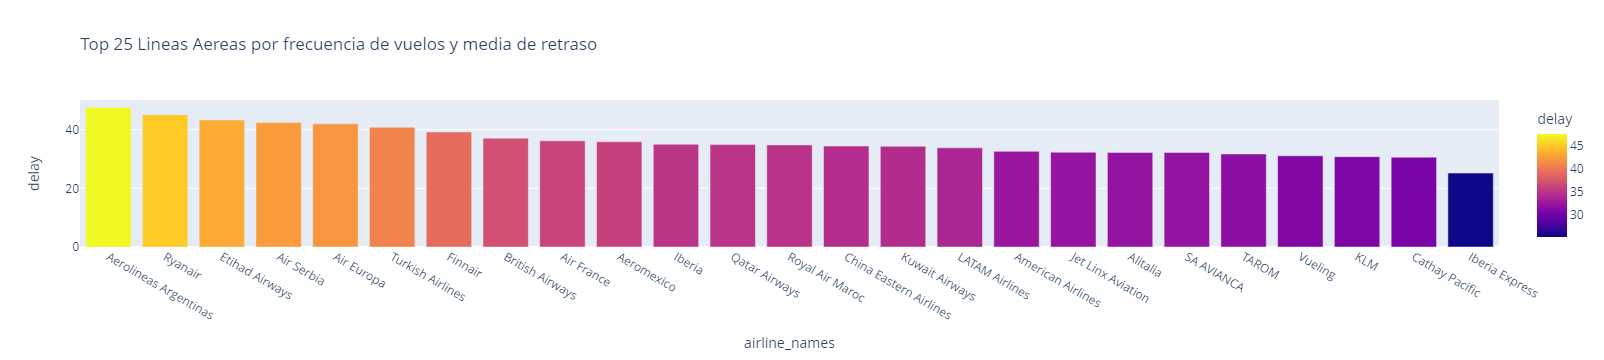

In [47]:

# Frecuencia de vuelos por cada linea aerea
frec_vuelos_aerolinea = df_dep_concat["airline_names"].value_counts().reset_index()

frec_vuelos_aerolinea.columns = ["airline_names", "flight_frequency"]

# Top 25
top_25_airlines = frec_vuelos_aerolinea.nlargest(25, "flight_frequency")

# Calculo de media por delay de linea aerea
avg_delay_airline = df_dep_concat[df_dep_concat["airline_names"].isin(top_25_airlines["airline_names"])].groupby("airline_names")["delay"].mean().reset_index()

avg_delay_airline = avg_delay_airline.sort_values(by="delay", ascending=False)

avg_delay_airline["delay"] = avg_delay_airline["delay"].round(1)

fig = px.bar(avg_delay_airline, x="airline_names", y="delay", title="Top 25 Lineas Aereas por frecuencia de vuelos y media de retraso", color='delay')
fig.show()

## Análisis
 
 1 - Aerolineas Argentinas tiene mas promedio de tiempo de retraso con alrededor de 47 minutos por cada salida con relacion a las frecuencias diarias.
 
 2 - Iberia Express tiene el menor promedio de tiempo de retraso con alrededor de 25 minutos por cada salida con relacion a las frecuencias diarias
 
 3 - La mayoria de las aerolineas tienen una media de retraso entre 30 a 37 minutos
 

## "Lineas Aereas por delay promedio mas alto"

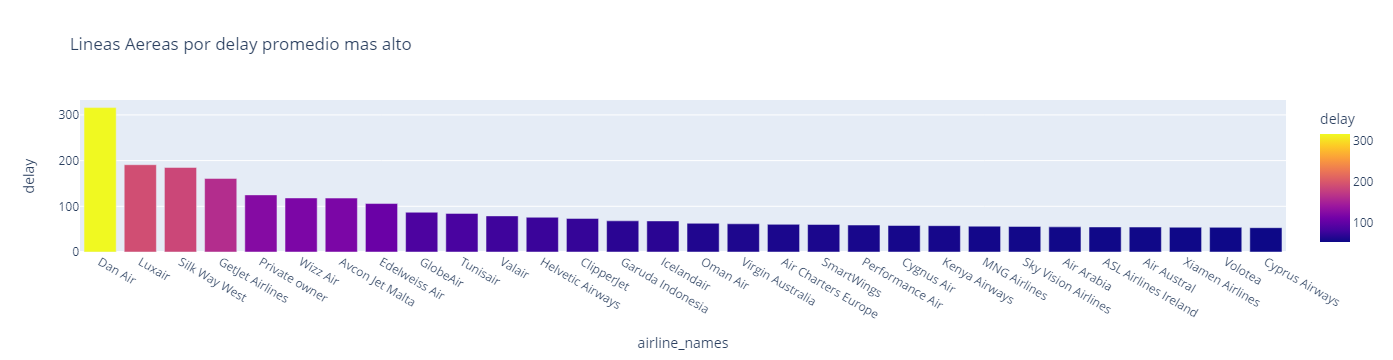

In [46]:
# Calcular el delay promedio por aerolínea
avg_delay_airline = df_dep_concat.groupby("airline_names")["delay"].mean().reset_index()

# Ordenar las aerolíneas por delay promedio de mayor a menor
avg_delay_airline = avg_delay_airline.sort_values(by="delay", ascending=False)

# Seleccionar las 30 primeras aerolíneas
top_30_airlines = avg_delay_airline.head(30).round(1)

# Crear el gráfico de barras
fig = px.bar(top_30_airlines, x="airline_names", y="delay", title="Lineas Aereas por delay promedio mas alto", color = 'delay')
fig.show()

## Análisis
 
 1 - Con independencia de la fecuencia de vuelo diaria durante el período evaluado, éstas aerolineas tienen la media de mayor retraso, incluye lienas aereas comerciales y carga.
 
 2 - El valor de media de retraso oscila desde 316 minutos de Dan Air (Linea Comercial Rumana) hasta 53 minutos de Cyprus Airways (Linea comercial y carga de Chipre)

## "Top 10 Puertas de Embarque por Aerolínea"

C:\Users\Tato\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



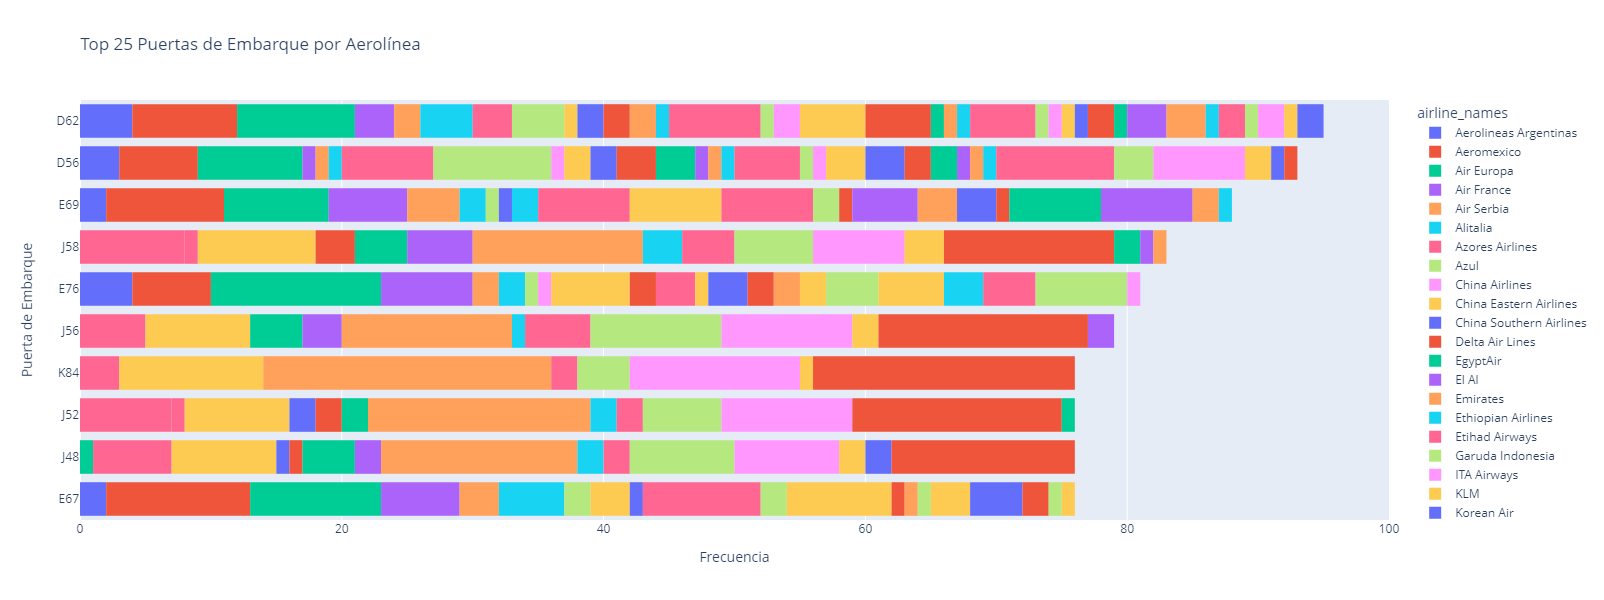

In [54]:
import plotly.express as px

# Agrupar por gate y airline_names, y contar la frecuencia de cada combinación
gate_airline_counts = df_dep_concat.groupby(["gate", "airline_names"])["gate"].count().reset_index(name="count")

# Filtrar las 25 puertas que más se repiten, excluyendo X99 (outliers)
top_25_gates = gate_airline_counts[gate_airline_counts["gate"] != "X99"].groupby("gate")["count"].sum().sort_values(ascending=False).head(10).index

# Filtrar los datos para las 25 puertas que más se repiten, excluyendo X99
top_25_gate_airline_counts = gate_airline_counts[(gate_airline_counts["gate"].isin(top_25_gates)) & (gate_airline_counts["gate"] != "X99")]

# Graficar histograma
fig = px.histogram(top_25_gate_airline_counts, 
                   x="count", 
                   y="gate", 
                   color="airline_names", 
                   title="Top 25 Puertas de Embarque por Aerolínea")

fig.update_layout(width=1450, height=600)
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.update_layout(xaxis_title="Frecuencia", yaxis_title="Puerta de Embarque")

fig.show()

## Análisis

1 - La puerta de embarque mas usada por las aerolineas es D62 del Terminal 2 con vuelos nacionales y espacio Schengen, de alli el uso de lineas nacionales e internacionales.

2 - Para el periodo analizado, Air Europa es la aerolinea que más hace uso de la puerta de embarque D62.

3 - Sudia Airline, Turkishh Airline y Bulgarian Air son algunas de las menor uso hacen de la puerta de embarque D62.


## "Top 15 Airlines por aeropuerto destino"

C:\Users\Tato\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



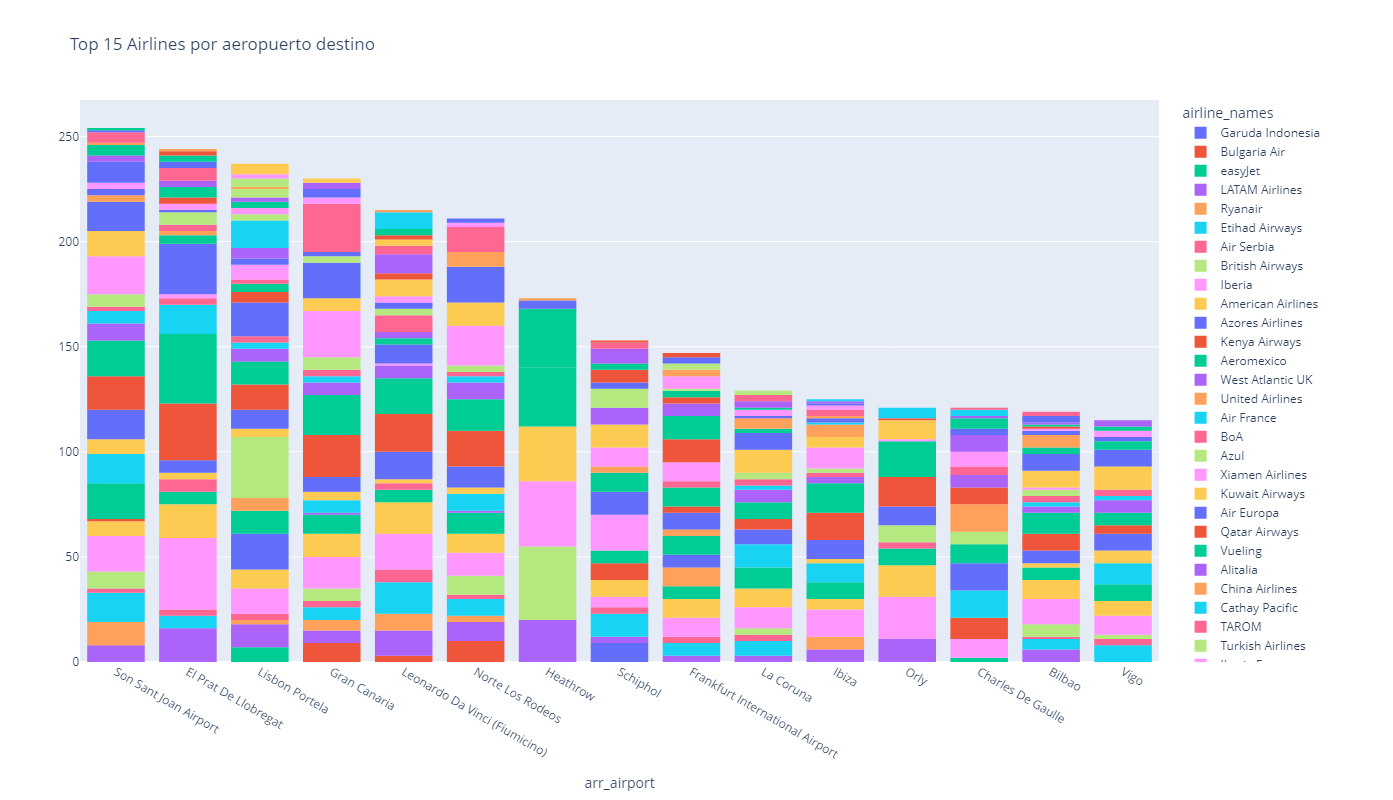

In [48]:
top_15_airlines = df_dep_concat["arr_airport"].value_counts().nlargest(15).index


fig = px.histogram(df_dep_concat[df_dep_concat["arr_airport"].isin(top_15_airlines)], 
             x          = "arr_airport",
             color      = "airline_names",
             nbins      = 200,
             title      = "Top 15 Airlines por aeropuerto destino")

fig.update_layout(xaxis={'categoryorder': 'total descending'},yaxis_title = "")

fig.update_layout(width=1500, height =800)

fig.show()

## Analisis

1 - Del Top de los 15 aeropuertos, 7 destinos son aeropuertos nacionales, 8 internacionales.

2 - Iberia, Aeromexico, Iberia Express y Qatar Airways son las aerolineas con más frecuencia de vuelos al aeropuerto Son Sant Joan Airport, con 17 vuelos en el periodo analizado.

3 - Malta Air, Tarom Air y Middle East Airlines solo contribuyen con una frecuencia durante el mismo periodo.

4 - Heathrow es el aeropuerto que acumula mas frecuencias diarias en menos aerolineas. (American Airlines, British Airways,Latam, Vueling ,Iberia, Jet Linx Aviation, TAAG y Gestair)

## "Distribución de retrasos de aerolíneas  y dia del vuelo"

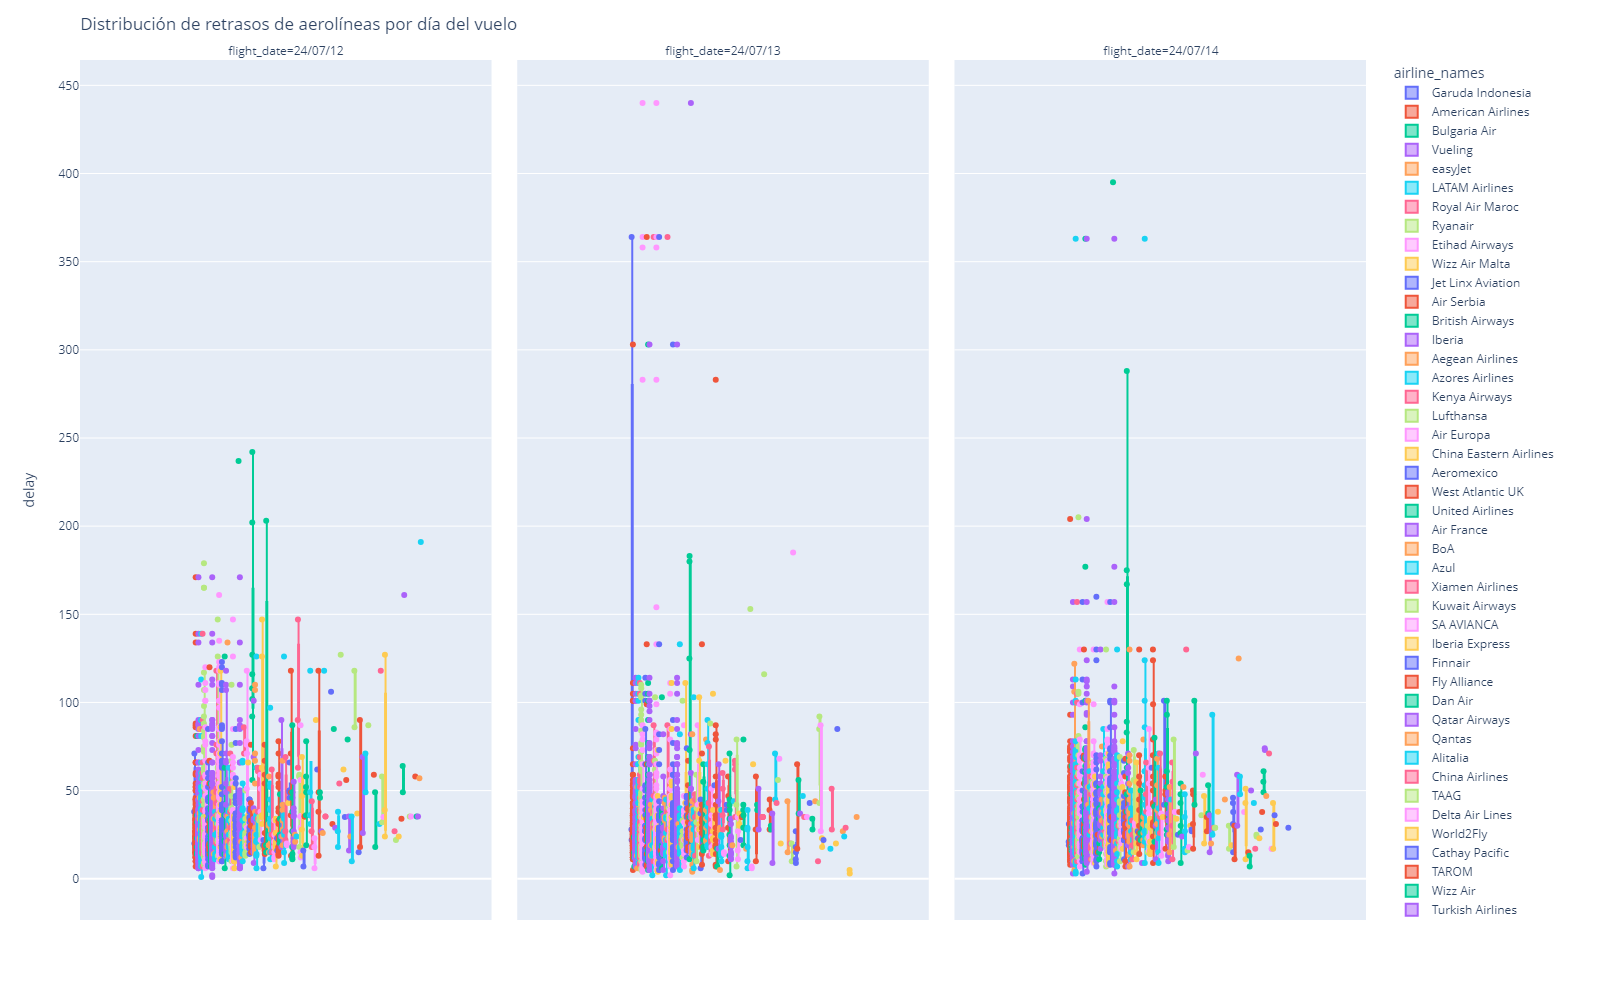

In [50]:
fig = px.box(df_dep_concat, 
             y="delay", 
             color="airline_names", 
             facet_col="flight_date", 
             points="all")

fig.update_layout(title="Distribución de retrasos de aerolíneas por día del vuelo")
fig.update_layout(width=1500, height=1000)
fig.show()

## Analisis

  # Valores:
dia 12 min =15  q1 =16  median = 19 q3 =157  max =203

dia 13 min = 22 q1 =23.5 median 28 q3 = 280  max = 364

dia 14 min = 38 q1 = 55.5 median 86 q3 = 171 max = 288


1 - Hay una tendencia clara de aumento en los retrasos a lo largo de los tres días, con el día 14 presentando la mediana(86 min), comparado con día 13 (28 min) y dia 12 (19 min)

2 - Los valores del tercer cuartil (Q3)(157,280,171) respectivamente, sugieren que una proporción significativa de vuelos se retrasaron severamente en todos los días.

3 - Los valores de retraso mínimo indican que algunos vuelos lograron salir a tiempo o con retrasos cortos en todos los días

4 - Es importante destacar que los valores máximos de retraso en cada día sean significativamente altos, con retrasos de más de 3 horas en algunos casos, y un retraso máximo de más de 6 horas en el día 13.



## "Cantidad de vuelos por dia y aerolínea"

C:\Users\Tato\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



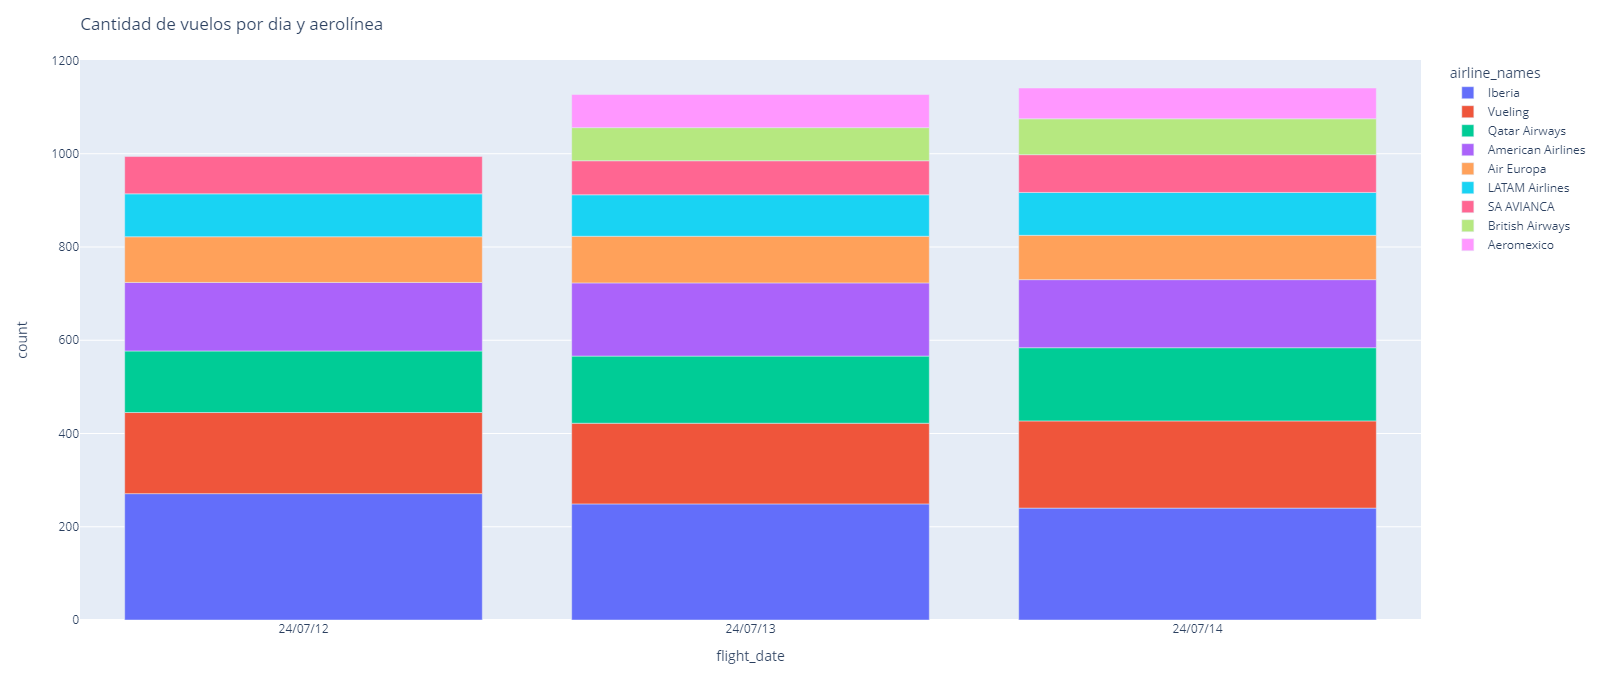

In [53]:
import plotly.express as px

# Agrupar  los datos por flight_date y airline_names, y hacer un count
df_grouped = df_dep_concat.groupby(["flight_date", "airline_names"]).size().reset_index(name="count").sort_values(by='count', ascending=False).head(25)

fig = px.bar(df_grouped, x="flight_date", y="count", color="airline_names")

fig.update_layout(title="Number of Flights by Date and Airline")
fig.update_layout(width=1000, height =700)
fig.update_layout(title="Cantidad de vuelos por dia y aerolínea")
fig.show()

## Analisis

1 - Se pude apreciar que de los 3 dias bajo analisis, sábado y domingo muestran un incremento de vuelos de 133 y 147 respctivamente comparado con el viernes.

2 - Predomina un dominio en los tres días de Iberia con 760 vuelos a distintos destinos.

3 - La aerolínea Aeromexico es la que menos cantidad de vuelos realiza sábado y domingo,con 137 vuelos en total.

4 - En el período de analisis, existe un dominio de aerlineas extranjeras (6) y y de origen español (3)
